# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [5]:
df = pd.read_csv('C:\\Users\\horta\\Documents\\Nueva carpeta\\Data_Analyst\\Machine_Learning\\2-No_Supervisado\\1-PCA\\Practica\\data\\comprar_alquilar.csv')

print(df.head())



   ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda   
0      6000            1000           0           600    50000    400000  \
1      6745             944         123           429    43240    636897   
2      6455            1033          98           795    57463    321779   
3      7098            1278          15           254    54506    660933   
4      6167             863         223           520    41512    348932   

   estado_civil  hijos  trabajo  comprar  
0             0      2        2        1  
1             1      3        6        0  
2             2      1        8        1  
3             0      0        3        0  
4             0      0        3        1  


### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

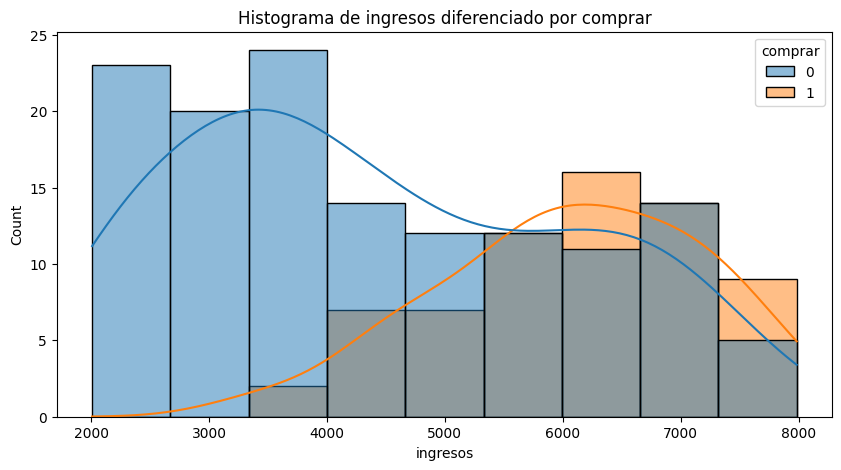

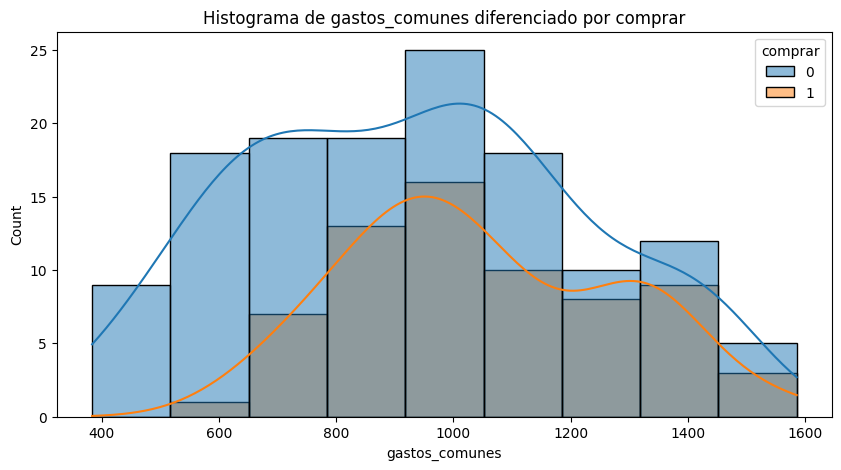

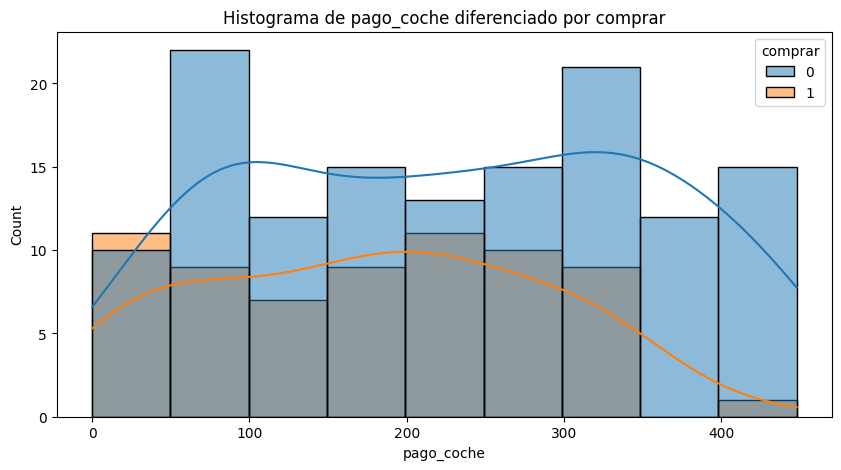

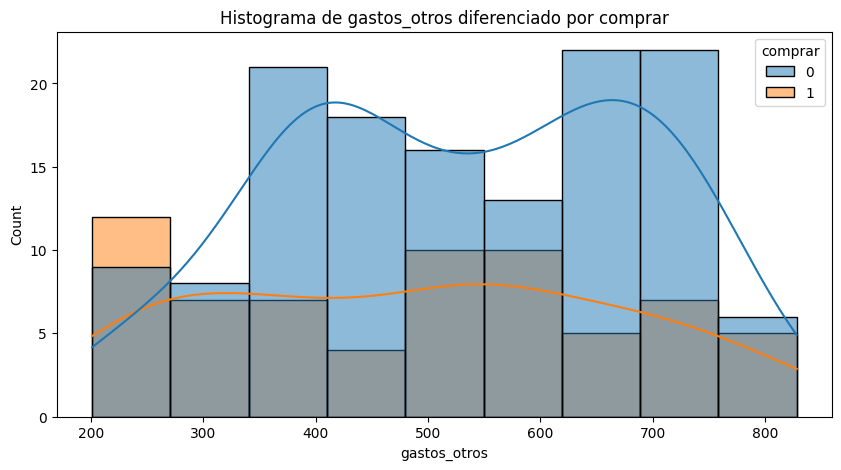

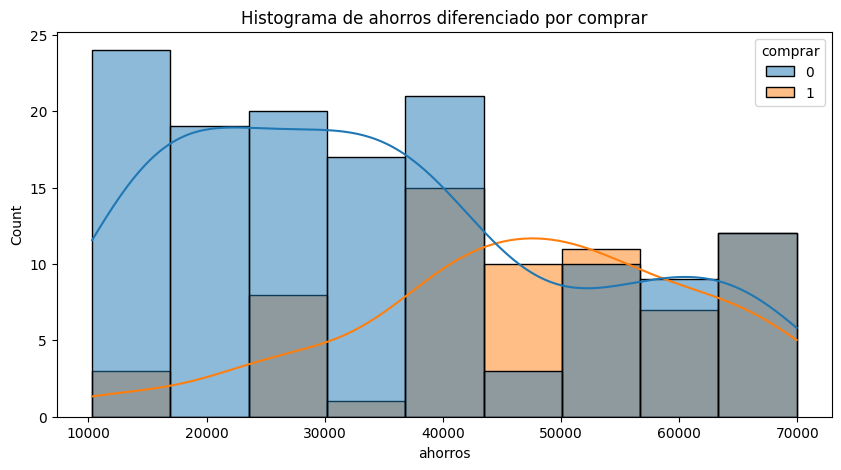

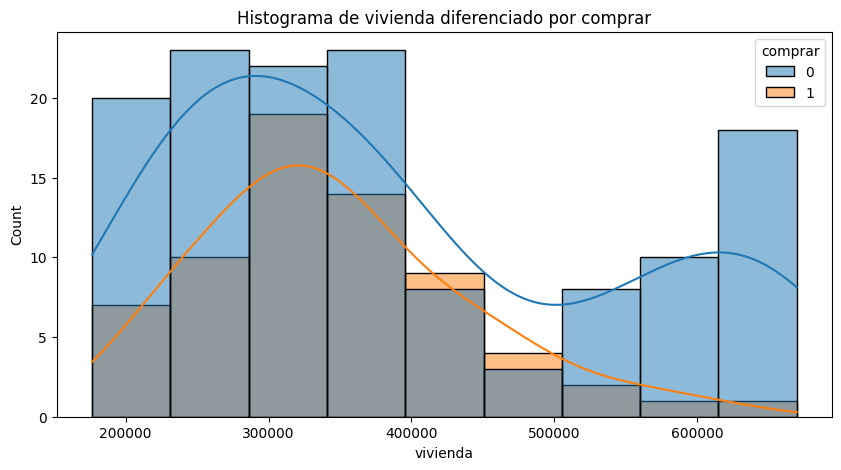

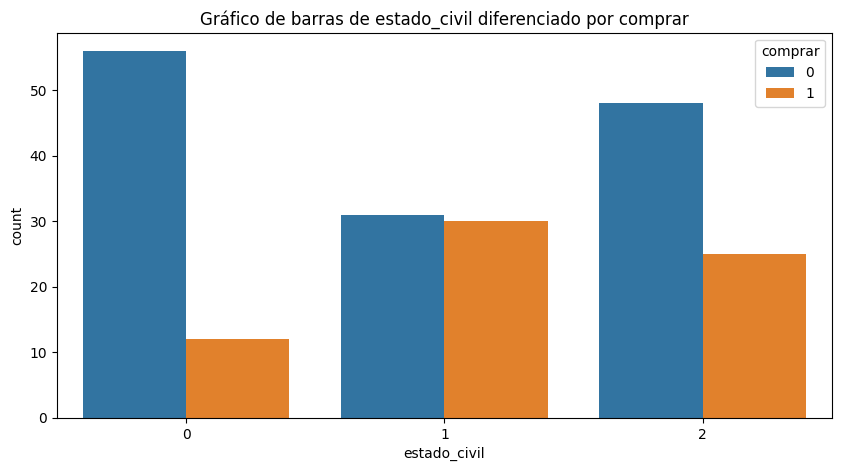

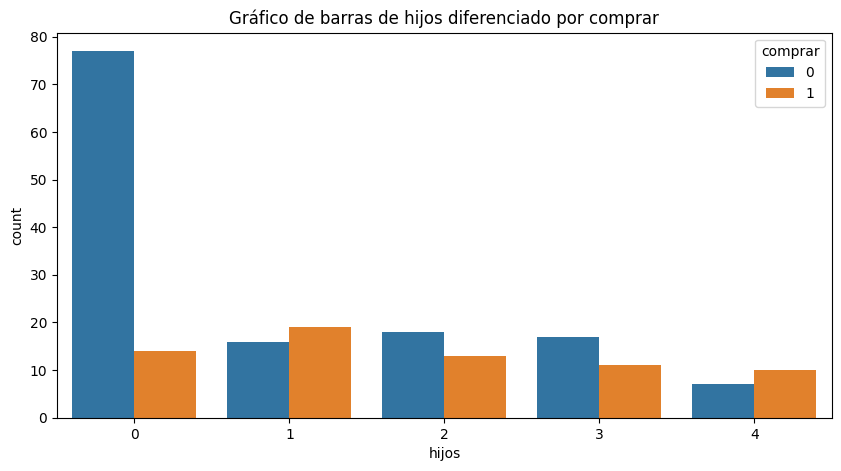

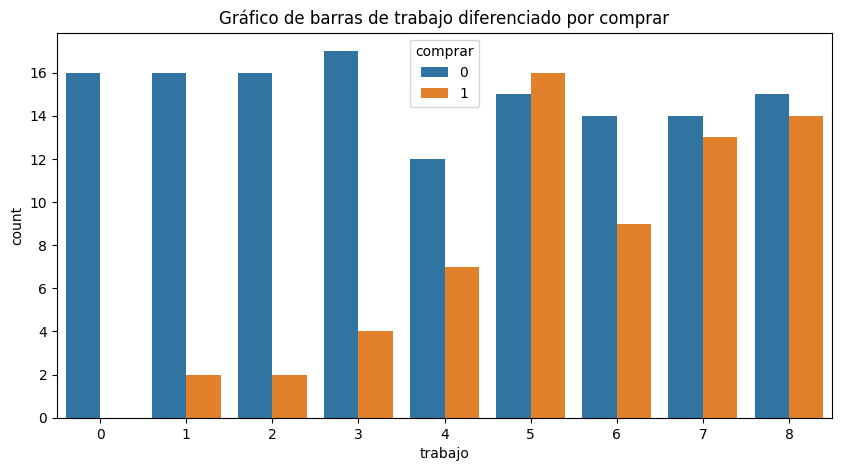

In [6]:
import seaborn as sns

num_columns = ['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros', 'vivienda']

for col in num_columns:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df, x=col, hue='comprar', kde=True)
    plt.title(f'Histograma de {col} diferenciado por comprar')
    plt.show()

cat_columns = ['estado_civil', 'hijos', 'trabajo']

for col in cat_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col, hue='comprar')
    plt.title(f'Gráfico de barras de {col} diferenciado por comprar')
    plt.show()


## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df)

df_scaled = scaler.transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)



## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
df_pca = pca.fit_transform(df_scaled)



### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [13]:
# varianza
df_pca = pca.fit_transform(df_scaled)

explained_variance = pca.explained_variance_ratio_

for i, exp_var in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {exp_var*100:.2f}% de la varianza total")


Principal Component 1: 27.37% de la varianza total
Principal Component 2: 23.96% de la varianza total
Principal Component 3: 10.99% de la varianza total
Principal Component 4: 10.41% de la varianza total
Principal Component 5: 9.11% de la varianza total
Principal Component 6: 7.35% de la varianza total
Principal Component 7: 4.58% de la varianza total
Principal Component 8: 2.75% de la varianza total
Principal Component 9: 2.47% de la varianza total


In [14]:
# Calcular la varianza explicada acumulada
cumulative_explained_variance = np.cumsum(explained_variance)
for i, cum_exp_var in enumerate(cumulative_explained_variance):
    print(f"Los primeros {i+1} componentes explican {cum_exp_var*100:.2f}% de la varianza total")


Los primeros 1 componentes explican 27.37% de la varianza total
Los primeros 2 componentes explican 51.33% de la varianza total
Los primeros 3 componentes explican 62.32% de la varianza total
Los primeros 4 componentes explican 72.73% de la varianza total
Los primeros 5 componentes explican 81.83% de la varianza total
Los primeros 6 componentes explican 89.19% de la varianza total
Los primeros 7 componentes explican 93.77% de la varianza total
Los primeros 8 componentes explican 96.51% de la varianza total
Los primeros 9 componentes explican 98.98% de la varianza total


In [15]:
# Crear el objeto PCA
pca = PCA(n_components=9)

df_pca = pca.fit_transform(df_scaled)

var_exp = np.cumsum(pca.explained_variance_ratio_)

print(f"La varianza explicada por los primeros 5 componentes es: {var_exp[4]*100:.2f}%")


La varianza explicada por los primeros 5 componentes es: 81.83%


### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

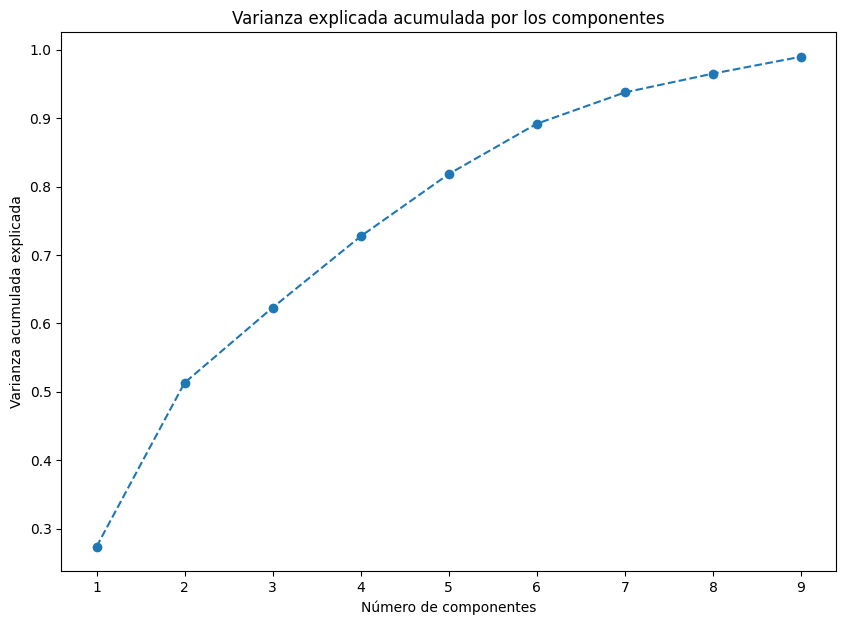

In [16]:
plt.figure(figsize=(10,7))
plt.plot(range(1, 10), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle="--")
plt.title("Varianza explicada acumulada por los componentes")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada explicada")
plt.show()


### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

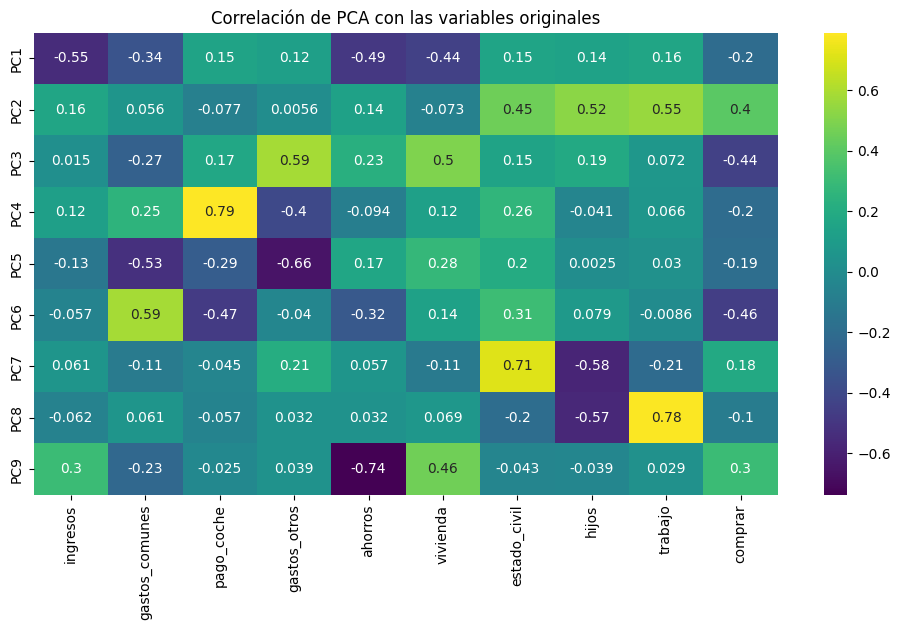

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(pca.components_, cmap='viridis', yticklabels=[f"PC{i}" for i in range(1,10)], 
            xticklabels=list(df.columns), annot=True)
plt.title("Correlación de PCA con las variables originales")
plt.show()


## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - KNN con 3 vecinos
3. Entrena
4. Predice en test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de vecinos y componentes mejoraría el accuracy en test?
8. Guarda tu modelo

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('comprar', axis=1)
y = df['comprar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Dimensiones del conjunto de entrenamiento: {X_train.shape}')
print(f'Dimensiones del conjunto de prueba: {X_test.shape}')


Dimensiones del conjunto de entrenamiento: (161, 9)
Dimensiones del conjunto de prueba: (41, 9)


In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

pipe = make_pipeline(
    StandardScaler(),
    PCA(n_components=5),
    KNeighborsClassifier(n_neighbors=3)
)



In [21]:
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, pipe.predict(X_train))
accuracy_test = accuracy_score(y_test, y_pred)

print(f"Accuracy en el conjunto de entrenamiento: {accuracy_train}")
print(f"Accuracy en el conjunto de prueba: {accuracy_test}")


Accuracy en el conjunto de entrenamiento: 0.9130434782608695
Accuracy en el conjunto de prueba: 0.7560975609756098


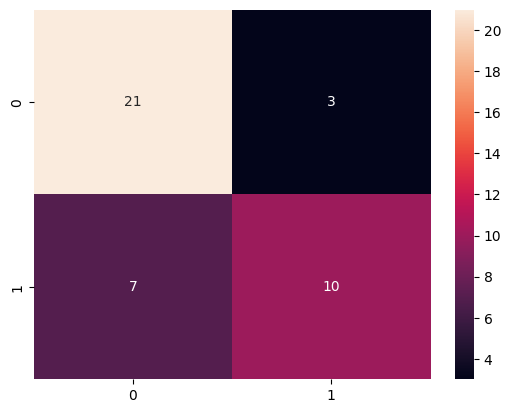

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d")
plt.show()


Guarda el modelo

In [25]:
import pickle


with open('mi_modelo.pkl', 'wb') as archivo:
    pickle.dump(pipe, archivo)
